<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Download Data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Share-type---select-only-common-stocks" data-toc-modified-id="Share-type---select-only-common-stocks-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Share type - select only common stocks</a></span></li><li><span><a href="#Select-stocks-traded-on-the-major-stock-exchanges" data-toc-modified-id="Select-stocks-traded-on-the-major-stock-exchanges-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Select stocks traded on the major stock exchanges</a></span></li></ul></li><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-securities" data-toc-modified-id="Number-of-securities-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Number of securities</a></span></li><li><span><a href="#Number-of-firms" data-toc-modified-id="Number-of-firms-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Number of firms</a></span></li><li><span><a href="#Returns-Summary" data-toc-modified-id="Returns-Summary-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Returns Summary</a></span></li><li><span><a href="#Average-Returns" data-toc-modified-id="Average-Returns-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Average Returns</a></span></li><li><span><a href="#Market-Returns" data-toc-modified-id="Market-Returns-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Market Returns</a></span></li></ul></li><li><span><a href="#Portfolio-Sorts" data-toc-modified-id="Portfolio-Sorts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Portfolio Sorts</a></span><ul class="toc-item"><li><span><a href="#Create-sort-data" data-toc-modified-id="Create-sort-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create sort data</a></span></li><li><span><a href="#Sort-Portfolio" data-toc-modified-id="Sort-Portfolio-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sort Portfolio</a></span><ul class="toc-item"><li><span><a href="#Check-Portfolio-Population" data-toc-modified-id="Check-Portfolio-Population-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Check Portfolio Population</a></span></li><li><span><a href="#Check-Portfolio-Population-(Again)" data-toc-modified-id="Check-Portfolio-Population-(Again)-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Check Portfolio Population (Again)</a></span></li></ul></li></ul></li><li><span><a href="#Portfolio-returns" data-toc-modified-id="Portfolio-returns-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Portfolio returns</a></span><ul class="toc-item"><li><span><a href="#Rankdate-definition" data-toc-modified-id="Rankdate-definition-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Rankdate definition</a></span></li><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Merge data</a></span></li><li><span><a href="#Calculate-returns" data-toc-modified-id="Calculate-returns-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Calculate returns</a></span></li></ul></li><li><span><a href="#Momentum-Factor" data-toc-modified-id="Momentum-Factor-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Momentum Factor</a></span></li><li><span><a href="#Compare-with-Fama-and-French-(Ken-French-website)" data-toc-modified-id="Compare-with-Fama-and-French-(Ken-French-website)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Compare with Fama and French (Ken French website)</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Loot-at-the-time-series" data-toc-modified-id="Loot-at-the-time-series-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Loot at the time series</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
#%% Packages 
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 6]
idx = pd.IndexSlice

In [2]:
# Packages from fire_pytools
sys.path.append("/Users/liramertens/src/fire_pytools") 

from utils.monthly_date import *
from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios
from import_kf.kf_factors import *

## Download Data

In [3]:
mdata = pd.read_pickle('/Users/liramertens/Dropbox/Columbia/BigData/class2020/hw_outputs/hm_ii/stock_monthly.pkl')

In [4]:
mdata[mdata.permno==89130]

permno       date     dlret    dlretx  exchcd   naics   permco  \
1494262   89130 2001-07-31       NaN       NaN     NaN     NaN  41998.0   
1502167   89130 2001-08-31       NaN       NaN     1.0    None  41998.0   
1509989   89130 2001-09-28       NaN       NaN     1.0    None  41998.0   
1517785   89130 2001-10-31       NaN       NaN     1.0    None  41998.0   
1525563   89130 2001-11-30       NaN       NaN     1.0    None  41998.0   
1533284   89130 2001-12-31       NaN       NaN     1.0    None  41998.0   
1540948   89130 2002-01-31       NaN       NaN     1.0    None  41998.0   
1548563   89130 2002-02-28       NaN       NaN     1.0    None  41998.0   
1556147   89130 2002-03-28       NaN       NaN     1.0    None  41998.0   
1563693   89130 2002-04-30       NaN       NaN     1.0    None  41998.0   
1571190   89130 2002-05-31       NaN       NaN     1.0    None  41998.0   
1578654   89130 2002-06-28       NaN       NaN     1.0    None  41998.0   
1586097   89130 2002-07-31       NaN       NaN     1.0    None  41998.0   
1593498   89130 2002-08-30       NaN       NaN     1.0    None  41998.0   
1600845   89130 2002-09-30       NaN       NaN     1.0    None  41998.0   
1608185   89130 2002-10-31       NaN       NaN     1.0    None  41998.0   
1615500   89130 2002-11-29       NaN       NaN     1.0    None  41998.0   
1622799   89130 2002-12-31       NaN       NaN     1.0    None  41998.0   
1630052   89130 2003-01-31       NaN       NaN     1.0    None  41998.0   
1637258   89130 2003-02-28       NaN       NaN     1.0    None  41998.0   
1644425   89130 2003-03-31       NaN       NaN     1.0    None  41998.0   
1651534   89130 2003-04-30       NaN       NaN     1.0    None  41998.0   
1658614   89130 2003-05-30       NaN       NaN     1.0    None  41998.0   
1665668   89130 2003-06-30       NaN       NaN     1.0    None  41998.0   
1672691   89130 2003-07-31       NaN       NaN     1.0    None  41998.0   
1679683   89130 2003-08-29       NaN       NaN     1.0    None  41998.0   
1686654   89130 2003-09-30       NaN       NaN     1.0    None  41998.0   
1693615   89130 2003-10-31       NaN       NaN     1.0    None  41998.0   
1700572   89130 2003-11-28       NaN       NaN     1.0    None  41998.0   
1707524   89130 2003-12-31       NaN       NaN     1.0    None  41998.0   
1714459   89130 2004-01-30       NaN       NaN     1.0    None  41998.0   
1721406   89130 2004-02-27       NaN       NaN     1.0    None  41998.0   
1728351   89130 2004-03-31       NaN       NaN     1.0    None  41998.0   
1735297   89130 2004-04-30       NaN       NaN     1.0    None  41998.0   
1742238   89130 2004-05-28       NaN       NaN     1.0    None  41998.0   
1749177   89130 2004-06-30       NaN       NaN     1.0  513322  41998.0   
1756132   89130 2004-07-30       NaN       NaN     1.0  513322  41998.0   
1763067   89130 2004-08-31       NaN       NaN     1.0  513322  41998.0   
1769994   89130 2004-09-30       NaN       NaN     1.0  513322  41998.0   
1776945   89130 2004-10-29       NaN       NaN     1.0  513322  41998.0   
1783900   89130 2004-11-30       NaN       NaN     1.0  513322  41998.0   
1790862   89130 2004-12-31       NaN       NaN     1.0  513322  41998.0   
1797807   89130 2005-01-31       NaN       NaN     1.0  513322  41998.0   
1804755   89130 2005-02-28       NaN       NaN     1.0  513322  41998.0   
1811705   89130 2005-03-31       NaN       NaN     1.0  513322  41998.0   
1818650   89130 2005-04-29       NaN       NaN     1.0  513322  41998.0   
1825599   89130 2005-05-31       NaN       NaN     1.0  513322  41998.0   
1832559   89130 2005-06-30       NaN       NaN     1.0  513322  41998.0   
1839524   89130 2005-07-29       NaN       NaN     1.0  513322  41998.0   
1846500   89130 2005-08-31       NaN       NaN     1.0  513322  41998.0   
1853455   89130 2005-09-30       NaN       NaN     1.0  513322  41998.0   
1860413   89130 2005-10-31       NaN       NaN     1.0  513322  41998.0   
1867370   89130 2005-11-30       N

In [5]:
mdata.head()

permno       date  dlret  dlretx  exchcd naics  permco  prc  ret  shrcd  \
0   10000 1985-12-31    NaN     NaN     NaN   NaN  7952.0  NaN  NaN    NaN   
1   10001 1985-12-31    NaN     NaN     NaN   NaN  7953.0  NaN  NaN    NaN   
2   10002 1985-12-31    NaN     NaN     NaN   NaN  7954.0  NaN  NaN    NaN   
3   10003 1985-12-31    NaN     NaN     NaN   NaN  7957.0  NaN  NaN    NaN   
4   10005 1985-12-31    NaN     NaN     NaN   NaN  7961.0  NaN  NaN    NaN   

   ...  comnam  retadj  me mesum  melag  ret_11  ret_11_1  rankyear   mdate  \
0  ...     NaN     NaN NaN   NaN    NaN     NaN       NaN      1985  198512   
1  ...     NaN     NaN NaN   NaN    NaN     NaN       NaN      1985  198512   
2  ...     NaN     NaN NaN   NaN    NaN     NaN       NaN      1985  198512   
3  ...     NaN     NaN NaN   NaN    NaN     NaN       NaN      1985  198512   
4  ...     NaN     NaN NaN   NaN    NaN     NaN       NaN      1985  198512   

         rf  
0  0.006139  
1  0.006139  
2  0.006139  
3  0.006139  
4  0.006139  

[5 rows x 23 columns]

## Clean Data

### Share type - select only common stocks 

In [6]:
mdata.shrcd.isin([10, 11]).mean()

0.7588489676668551

In [7]:
mdata = mdata[mdata.shrcd.isin([10, 11])]

### Select stocks traded on the major stock exchanges

In [8]:
mdata.exchcd.isin([1,2,3]).mean()

0.9825066875448555

In [9]:
mdata = mdata[mdata.exchcd.isin([1, 2, 3])]

## Data Summary

### Number of securities

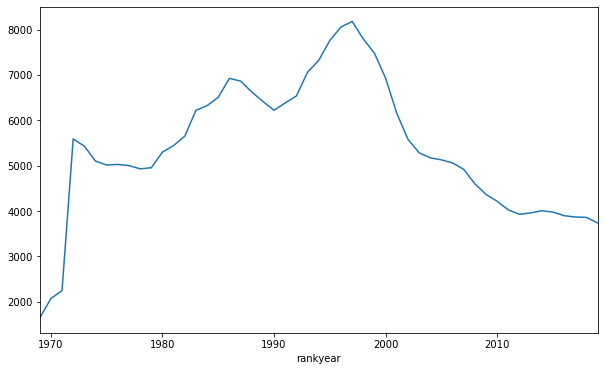

In [10]:
mdata.groupby('rankyear').permno.nunique().plot()

### Number of firms

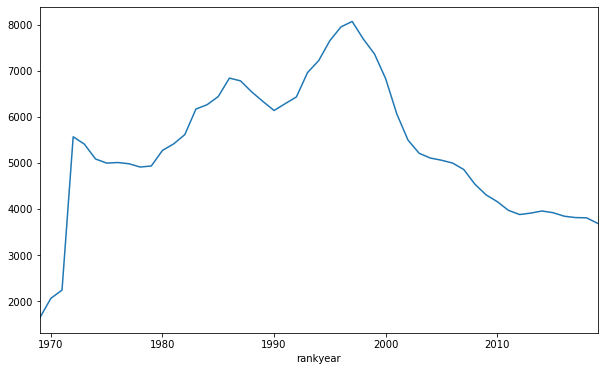

In [11]:
mdata.groupby('rankyear').permco.nunique().plot()

### Returns Summary

In [12]:
mdata.retadj.describe()

count    2.969259e+06
mean     1.102730e-02
std      1.907512e-01
min     -1.000000e+00
25%     -6.790431e-02
50%      0.000000e+00
75%      7.185629e-02
max      6.366667e+01
Name: retadj, dtype: float64

### Average Returns

In [13]:
mdata.groupby('date').retadj.mean().plot()

### Market Returns

In [14]:
ret_ts = mdata[mdata.retadj.notnull()&mdata.melag.notnull()].groupby('date').apply(lambda x: 
                                                                                   np.average(x['retadj'], 
                                                                                              weights = x['melag']))

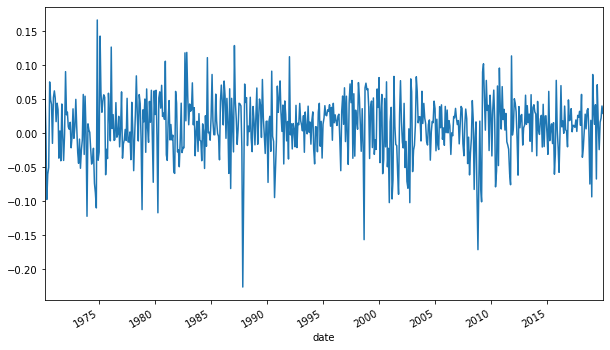

In [15]:
ret_ts.plot()

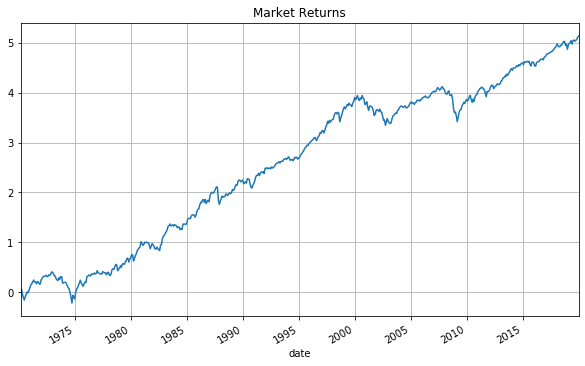

In [16]:
np.log(1+ret_ts).cumsum().plot(grid=True, title = 'Market Returns')

In [17]:
ret_ts.mean()*12*100

11.542293774038948

In [18]:
ret_ts.std()

0.044728140829477465

## Portfolio Sorts

### Create sort data

In [19]:
filter_data = (mdata.ret_11_1.notnull()) & (mdata.mesum>0)
filter_data.mean()

0.9165894143521962

In [20]:
sort_data = mdata[filter_data]

### Sort Portfolio

In [21]:
port = sort_portfolios(data = sort_data,
                       quantiles={'mesum': [0.5],
                                  'ret_11_1': [0.3, 0.7]},
                       id_variables=['date', 'permno', 'exchcd'],
                       exch_cd=[1])

NYSE breakpoints were calculated for mesum.
Stocks were sorted according to breakpoints, starting in 1970-09-30 00:00:00
NYSE breakpoints were calculated for ret_11_1.
Stocks were sorted according to breakpoints, starting in 1970-09-30 00:00:00


Look at the data.

In [22]:
port.head() 

date   permno ret_11_1portfolio mesumportfolio
0 1970-09-30  10006.0         ret_11_12         mesum2
1 1970-09-30  10057.0         ret_11_11         mesum1
2 1970-09-30  10102.0         ret_11_13         mesum2
3 1970-09-30  10137.0         ret_11_13         mesum2
4 1970-09-30  10145.0         ret_11_12         mesum2

#### Check Portfolio Population

In [23]:
port.groupby(['date', 'mesumportfolio']).permno.nunique()

date        mesumportfolio
1970-09-30  mesum1             990
            mesum2             567
1970-10-30  mesum1            1016
            mesum2             574
1970-11-30  mesum1            1047
                              ... 
2019-10-31  mesum2             956
2019-11-29  mesum1            2502
            mesum2             956
2019-12-31  mesum1            2492
            mesum2             952
Name: permno, Length: 1184, dtype: int64

In [24]:
port.groupby(['date', 'ret_11_1portfolio']).permno.nunique()

date        ret_11_1portfolio
1970-09-30  ret_11_11             552
            ret_11_12             591
            ret_11_13             414
1970-10-30  ret_11_11             548
            ret_11_12             581
                                 ... 
2019-11-29  ret_11_12            1289
            ret_11_13             893
2019-12-31  ret_11_11            1318
            ret_11_12            1235
            ret_11_13             891
Name: permno, Length: 1776, dtype: int64

#### Check Portfolio Population (Again)

In [25]:
portm = pd.merge(port, sort_data[['permno', 'date', 'exchcd']])

In [26]:
portm[portm.exchcd==1].groupby(['date', 'mesumportfolio']).permno.nunique()

date        mesumportfolio
1970-09-30  mesum1            542
            mesum2            541
1970-10-30  mesum1            548
            mesum2            547
1970-11-30  mesum1            556
                             ... 
2019-10-31  mesum2            611
2019-11-29  mesum1            611
            mesum2            609
2019-12-31  mesum1            603
            mesum2            603
Name: permno, Length: 1184, dtype: int64

In [27]:
portm[portm.exchcd==1].groupby(['date', 'ret_11_1portfolio']).permno.nunique()

date        ret_11_1portfolio
1970-09-30  ret_11_11            325
            ret_11_12            433
            ret_11_13            325
1970-10-30  ret_11_11            329
            ret_11_12            437
                                ... 
2019-11-29  ret_11_12            488
            ret_11_13            366
2019-12-31  ret_11_11            362
            ret_11_12            482
            ret_11_13            362
Name: permno, Length: 1776, dtype: int64

## Portfolio returns

### Rankdate definition

In [28]:
port['rankdate'] = port.date.dt.year * 100 + port.date.dt.month

In [29]:
port.drop(columns='date', inplace=True)

In [30]:
mdata['rankdate'] = mdata['date'] - pd.Timedelta('35 days')

In [31]:
mdata['rankdate'] = mdata.rankdate.dt.year * 100 + mdata.rankdate.dt.month

In [32]:
mdata[['permno', 'date', 'rankdate', 'retadj']]

permno       date  rankdate    retadj
11        10015 1985-12-31    198511  0.065789
20        10031 1985-12-31    198511 -0.013158
21        10057 1985-12-31    198511 -0.056604
23        10066 1985-12-31    198511 -0.138889
24        10074 1985-12-31    198511  0.073469
...         ...        ...       ...       ...
4039530   93422 2019-12-31    201911  0.376147
4039531   93423 2019-12-31    201911  0.037489
4039534   93426 2019-12-31    201911 -0.011915
4039537   93434 2019-12-31    201911 -0.070796
4039538   93436 2019-12-31    201911  0.267897

[3011776 rows x 4 columns]

### Merge data

In [33]:
fdata = pd.merge(mdata[['permno', 'date', 'rankdate', 'retadj', 'melag', 'ticker', 'comnam']], 
                port,
                on = ['permno', 'rankdate'])

Have a look at Apple in 2019. Which portfolio did Apple belong to?

In [34]:
fdata[(fdata.ticker=='AAPL') & (fdata.date.dt.year>=2019)]

permno       date  rankdate    retadj         melag ticker  \
2714701   14593 2019-01-31    201812  0.055154  7.460792e+05   AAPL   
2718134   14593 2019-02-28    201901  0.044701  7.848112e+05   AAPL   
2721570   14593 2019-03-29    201902  0.097026  8.164507e+05   AAPL   
2725011   14593 2019-04-30    201903  0.056436  8.956674e+05   AAPL   
2728462   14593 2019-05-31    201904 -0.123735  9.232977e+05   AAPL   
2731924   14593 2019-06-28    201905  0.130519  8.055102e+05   AAPL   
2735395   14593 2019-07-31    201906  0.076394  8.968537e+05   AAPL   
2738870   14593 2019-08-30    201907 -0.016570  9.627661e+05   AAPL   
2742352   14593 2019-09-30    201908  0.072962  9.433337e+05   AAPL   
2745831   14593 2019-10-31    201909  0.110684  9.951516e+05   AAPL   
2749303   14593 2019-11-29    201910  0.077424  1.105307e+06   AAPL   
2752761   14593 2019-12-31    201911  0.098784  1.187463e+06   AAPL   

            comnam ret_11_1portfolio mesumportfolio  
2714701  APPLE INC         ret_11_12         mesum2  
2718134  APPLE INC         ret_11_12         mesum2  
2721570  APPLE INC         ret_11_12         mesum2  
2725011  APPLE INC         ret_11_12         mesum2  
2728462  APPLE INC         ret_11_13         mesum2  
2731924  APPLE INC         ret_11_12         mesum2  
2735395  APPLE INC         ret_11_12         mesum2  
2738870  APPLE INC         ret_11_12         mesum2  
2742352  APPLE INC         ret_11_12         mesum2  
2745831  APPLE INC         ret_11_12         mesum2  
2749303  APPLE INC         ret_11_12         mesum2  
2752761  APPLE INC         ret_11_13         mesum2

### Calculate returns

In [35]:
fdata.retadj.notnull().mean()

0.9992415648585428

In [36]:
fdata = fdata[fdata.retadj.notnull()]

In [37]:
ret = fdata.groupby(['date', 
                     'mesumportfolio', 
                     'ret_11_1portfolio']).apply(lambda x: np.average(x['retadj'], 
                                                                weights = x['melag']))

In [38]:
ret = ret.unstack(level=[1, 2])

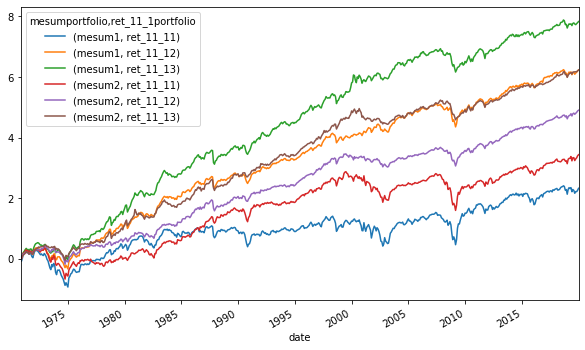

In [39]:
np.log(1+ret).cumsum().plot()

## Momentum Factor

In [40]:
ret

mesumportfolio       mesum1                        mesum2                    
ret_11_1portfolio ret_11_11 ret_11_12 ret_11_13 ret_11_11 ret_11_12 ret_11_13
date                                                                         
1970-10-30        -0.085917 -0.025760  0.004805 -0.029155 -0.008619 -0.008612
1970-11-30         0.014055  0.030712  0.035740  0.047314  0.052451  0.060531
1970-12-31         0.113678  0.091893  0.084287  0.072922  0.069190  0.043991
1971-01-29         0.143121  0.102222  0.089393  0.102260  0.048318  0.032029
1971-02-26         0.038716  0.031295  0.041244  0.004337  0.010539  0.021382
...                     ...       ...       ...       ...       ...       ...
2019-08-30        -0.089024 -0.056924 -0.035683 -0.092264 -0.038307  0.002013
2019-09-30         0.056056  0.039016 -0.021481  0.056150  0.031183 -0.001097
2019-10-31        -0.001278  0.030269  0.036619  0.037682  0.034726  0.007651
2019-11-29         0.045509  0.044428  0.036009  0.065868  0.045395  0.026410
2019-12-31         0.068808  0.031054  0.032270  0.039341  0.025664  0.029496

[591 rows x 6 columns]

In [41]:
ret.loc[:, idx[:, 'ret_11_13']]

mesumportfolio       mesum1    mesum2
ret_11_1portfolio ret_11_13 ret_11_13
date                                 
1970-10-30         0.004805 -0.008612
1970-11-30         0.035740  0.060531
1970-12-31         0.084287  0.043991
1971-01-29         0.089393  0.032029
1971-02-26         0.041244  0.021382
...                     ...       ...
2019-08-30        -0.035683  0.002013
2019-09-30        -0.021481 -0.001097
2019-10-31         0.036619  0.007651
2019-11-29         0.036009  0.026410
2019-12-31         0.032270  0.029496

[591 rows x 2 columns]

In [42]:
mom = ret.loc[:, idx[:, 'ret_11_13']].mean(axis=1)-ret.loc[:, idx[:, 'ret_11_11']].mean(axis=1)

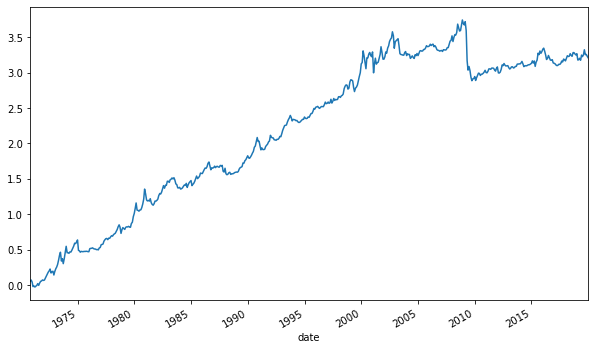

In [43]:
np.log(1+mom).cumsum().plot()

## Compare with Fama and French (Ken French website)

In [44]:
# Import MOM from Ken French website
ff = pd.read_csv('/Users/liramertens/Dropbox/Columbia/BigData/class2020/F-F_Momentum_Factor.CSV')


In [45]:
ff['mom_ff'] = ff['Mom']/100

In [46]:
# Set up our data
mom=mom.to_frame('mom')
mom.reset_index(inplace=True)
mom['mdate'] = mom.date.dt.year*100 + mom.date.dt.month

In [47]:
# Merge 
mom = pd.merge(mom, ff[['mdate', 'mom_ff']])

In [48]:
mom.drop(columns='mdate', inplace=True)

In [49]:
mom.set_index('date', inplace=True)

### Correlation

In [50]:
mom.corr()

mom   mom_ff
mom     1.00000  0.99835
mom_ff  0.99835  1.00000

### Loot at the time series

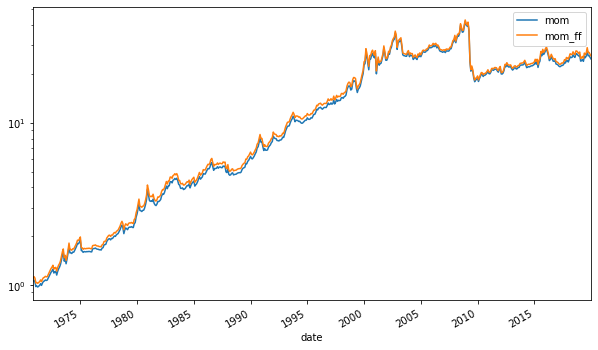

In [51]:
((1+mom).cumprod()).plot(logy=True)